<a href="https://colab.research.google.com/github/GiriRallapalli/Categorical-Features/blob/master/Covid_Prediction_13June2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X label: range(4, 184)
Coefficients: 
 [ 0.00000000e+00  2.00000000e+00  1.00000000e+00 -1.77635684e-15]
Intercept: 
 1.0
Variance score: 1.00
Next few numbers in the series are
25.000000000000007
25.000000000000007
35.999999999999986
35.999999999999986
48.99999999999993
48.99999999999993
63.999999999999844
63.999999999999844
80.9999999999997
80.9999999999997
99.9999999999995
99.9999999999995
120.99999999999922
120.99999999999922
143.99999999999886
143.99999999999886
168.99999999999838
168.99999999999838
195.99999999999784
195.99999999999784
224.9999999999972
224.9999999999972
255.99999999999636
255.99999999999636
288.99999999999545
288.99999999999545
323.9999999999944
323.9999999999944
360.9999999999931
360.9999999999931
399.99999999999164
399.99999999999164
440.99999999999005
440.99999999999005
483.99999999998835
483.99999999998835
528.9999999999864
528.9999999999864
575.9999999999842
575.9999999999842
624.9999999999817
624.9999999999817
675.999999999979
675.999999999979
728.99999999

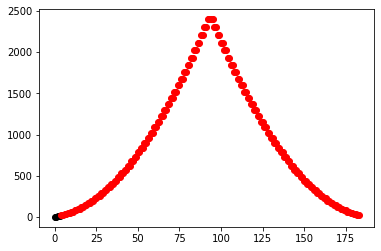

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model


#Define the problem
problem = [1,3,6,7,15,0,12,8,18,14,15,14,26,25,55,83,64,103,37,121,70,160,100,37,227,146,601,545,516,529,701,489,573,565,809,875,846,759,1248,1034,883,1060,922,2013,1250,924,1541,1290,1669,1408,1836,1607,1561,1873,1738,1801,2394,2442,2806,3932,2963,3587,3364,3344,3113,4353,3607,3524,3763,3942,3787,4864,5050,4630,6147,5553,6198,6568,6629,7113,6414,5843,7293,7300,8105,8336,8782,7761,8821,9633,9889,9471,10438,10864,8442,8852,12375,11128,11320]
#problem = [1,4,9,16]

#create x and y for the problem

x=[]
y=[]

#This is a power 3 equation, to create independent variables
power_of_equation = 3
power_of_equation = power_of_equation + 1

for (xi, yi) in enumerate(problem):
  features=[]
  for i in range(power_of_equation):
    features.append(pow(xi,i))
  x.append(features)
  y.append(yi)

x=np.array(x)
y=np.array(y)


# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(x, y)

#number of days to reach peak
days_peak = 45
rev_days_peak = days_peak * 2
slow_rev_days_peak = days_peak * 4

#create the testing set
x_test_range=range(len(x),days_peak+len(x))
x_test=[]
for xi in x_test_range:
  features=[]
  for i in range(power_of_equation):
    features.append(pow(xi,i))
  x_test.append(features)
  x_test.append(features)

# Reversing a list using reversed() 
def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

#print("X Test :",x_test)
#print("X Test Reverse:",Reverse(x_test))
x_test_rev = Reverse(x_test)

new_array = x_test.__add__(x_test_rev)

#print("ADDED:",new_array)
x_test_range=range(len(x),slow_rev_days_peak+len(x))
print("X label:",x_test_range)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
#print("Mean squared error: %.2f"% np.mean((regr.predict(x) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x,y))

#Do predictions
#y_predicted = regr.predict(x_test)
y_predicted = regr.predict(new_array)

print("Next few numbers in the series are")
for pred in y_predicted:
  print(pred)

plt.scatter(range(len(problem)), problem, color='black')
plt.scatter(x_test_range, y_predicted,  color='red')

plt.show()
